In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
loan_approval_df = pd.read_csv("../01_data/loan_approval_dataset.csv")
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loan_approval_df.shape

(4269, 13)

In [4]:
loan_approval_df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [5]:
loan_approval_df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [6]:
#cleaning column names
loan_approval_df.columns = loan_approval_df.columns.str.strip()
loan_approval_df.values #to be stripped as well

array([[1, 2, ' Graduate', ..., 22700000, 8000000, ' Approved'],
       [2, 0, ' Not Graduate', ..., 8800000, 3300000, ' Rejected'],
       [3, 3, ' Graduate', ..., 33300000, 12800000, ' Rejected'],
       ...,
       [4267, 2, ' Not Graduate', ..., 18100000, 7300000, ' Rejected'],
       [4268, 1, ' Not Graduate', ..., 14100000, 5800000, ' Approved'],
       [4269, 1, ' Graduate', ..., 35700000, 12000000, ' Approved']],
      dtype=object)

In [7]:
#switching categorical columns into numerical

loan_approval_df['education']=loan_approval_df['education'].replace({' Graduate':1,' Not Graduate':0})
loan_approval_df['self_employed'] = loan_approval_df['self_employed'].replace({' No': 0, ' Yes': 1})

loan_approval_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
# Create the 'total_assets_value' column by summing up the other asset columns
loan_approval_df['total_assets_value'] = (loan_approval_df['commercial_assets_value'] + 
                        loan_approval_df['luxury_assets_value'] + 
                        loan_approval_df['bank_asset_value'] + 
                        loan_approval_df['residential_assets_value'])

# Check the updated DataFrame
print(loan_approval_df[['loan_id', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'residential_assets_value', 'total_assets_value']].head())


   loan_id  commercial_assets_value  luxury_assets_value  bank_asset_value  \
0        1                 17600000             22700000           8000000   
1        2                  2200000              8800000           3300000   
2        3                  4500000             33300000          12800000   
3        4                  3300000             23300000           7900000   
4        5                  8200000             29400000           5000000   

   residential_assets_value  total_assets_value  
0                   2400000            50700000  
1                   2700000            17000000  
2                   7100000            57700000  
3                  18200000            52700000  
4                  12400000            55000000  


In [9]:
loan_approval_df['total_assets_value']

0       50700000
1       17000000
2       57700000
3       52700000
4       55000000
          ...   
4264     7400000
4265    20000000
4266    39000000
4267    28800000
4268    77300000
Name: total_assets_value, Length: 4269, dtype: int64

In [10]:
loan_approval_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [11]:
print(loan_approval_df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets_value'],
      dtype='object')


In [12]:
# Selecting specific columns
possible_features = loan_approval_df[['education', 'no_of_dependents', 'self_employed', 
                                      'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                                      'residential_assets_value', 'commercial_assets_value', 
                                      'luxury_assets_value', 'bank_asset_value', 'total_assets_value']]

# Display the selected columns
print(possible_features.head())
possible_features 

   education  no_of_dependents  self_employed  income_annum  loan_amount  \
0          1                 2              0       9600000     29900000   
1          0                 0              1       4100000     12200000   
2          1                 3              0       9100000     29700000   
3          1                 3              0       8200000     30700000   
4          0                 5              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  total_assets_value  

,education,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
0,1,2,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000
2,1,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000
3,1,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,52700000
4,0,5,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1,5,1,1000000,2300000,12,317,2800000,500000,3300000,800000,7400000
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,20000000
4266,0,2,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,39000000
4267,0,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,28800000


In [13]:
Possible_Target = loan_approval_df['loan_status']
Possible_Target

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object

In [14]:
#Test split
X_train, X_test, y_train, y_test = train_test_split(possible_features, Possible_Target, test_size = 0.20, random_state=0)

In [15]:
#from sklearn.preprocessing import OneHotEncoder


#ohe = OneHotEncoder(sparse_output=False)

#ohe.fit(X_train[['education','self_employed']])
#X_train_trans_np = ohe.transform(X_train[['education','self_employed']])
#X_train_trans_np

In [16]:
#X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
#X_train_trans_df

In [17]:
#X_test_trans_np = ohe.transform(X_test[['education','self_employed']])
#X_test_trans_np

In [18]:
#X_test_trans_np = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
#X_test_trans_np

In [19]:
# Assuming X_train_trans_df is the transformed feature DataFrame from the first image
# And loan_approval_df is the main DataFrame from the second image

# Join on the index or another common column if needed
#merged_df = pd.concat([loan_approval_df, X_train_trans_df, X_test_trans_np], axis=1)

# Check the merged DataFrame
#print(merged_df.head())
#merged_df

## Decision tree classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state = 50)

# Train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=50)

In [35]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([' Approved', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Approved', ' Rejected', ' Rejected', ' Approved',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Approved', ' Rejected', ' App

In [31]:
from collections import Counter

# Assuming y_pred is your array
count_result = Counter(y_pred)

# Print the counts
print(count_result)

Counter({' Approved': 522, ' Rejected': 332})


In [32]:
y_test

1972     Approved
528      Approved
3540     Approved
87       Rejected
1621     Rejected
          ...    
1505     Approved
2423     Rejected
489      Rejected
2653     Approved
3881     Rejected
Name: loan_status, Length: 854, dtype: object

In [36]:
# Assuming y_pred is your array
count_result_2 = Counter(y_test)

# Print the counts
print(count_result)

Counter({' Approved': 522, ' Rejected': 332})


In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print a detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9707
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       523
    Rejected       0.96      0.96      0.96       331

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



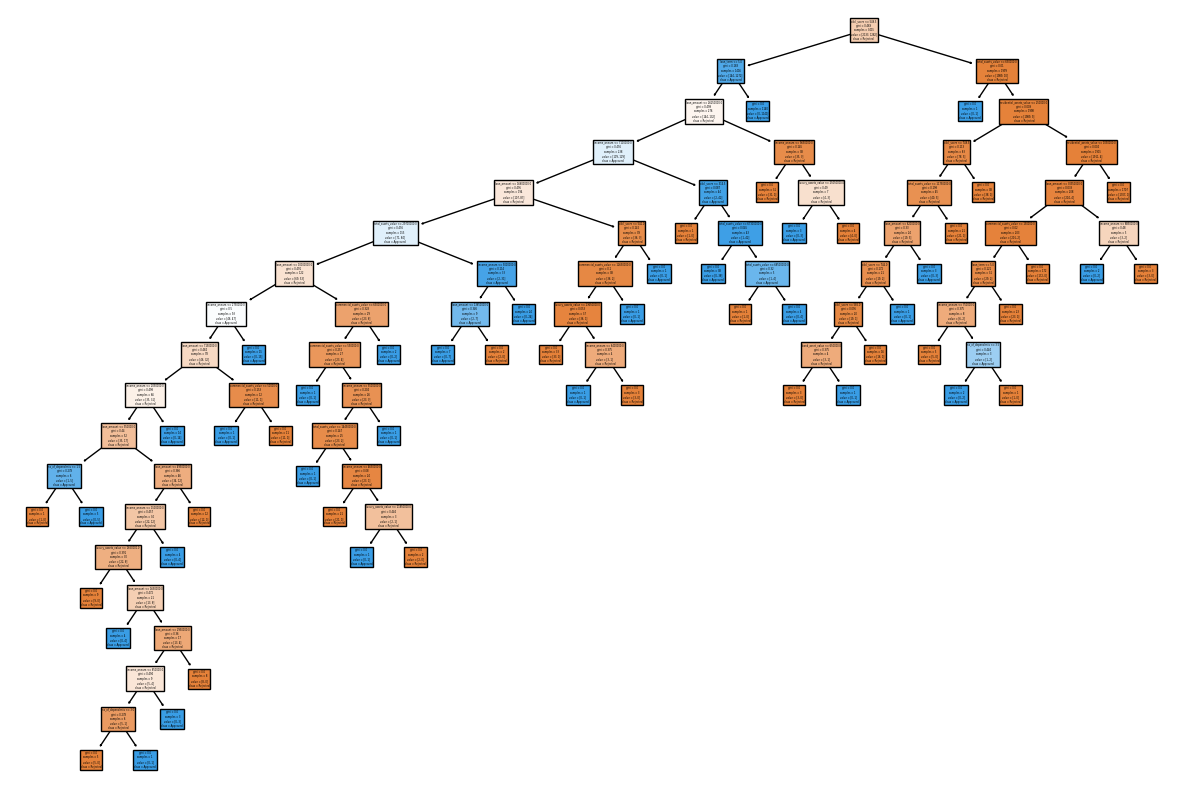

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the feature names from X_train to ensure they match
feature_names = X_train.columns

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=feature_names, class_names=['Rejected', 'Approved'], filled=True)
plt.show()


In [39]:
# Get feature importance
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                     Feature  Importance
6                cibil_score    0.829925
5                  loan_term    0.076002
4                loan_amount    0.034058
3               income_annum    0.033852
11        total_assets_value    0.012436
8    commercial_assets_value    0.005061
9        luxury_assets_value    0.004394
1           no_of_dependents    0.002914
10          bank_asset_value    0.000937
7   residential_assets_value    0.000422
0                  education    0.000000
2              self_employed    0.000000


### Adjusting Decision tree

In [ ]:
# Adjusting the Decision tree model. ,  min_samples_split = 5

In [76]:
# Class weighting (Balancing)
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=3 , random_state=50)

In [77]:
# Train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=50)

In [88]:
#Resampling
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=50)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [89]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([' Approved', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Approved', ' Rejected', ' Rejected', ' Approved',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Approved', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Rejected',
       ' Rejected', ' Rejected', ' Approved', ' Rejected', ' Rej

In [90]:
from collections import Counter

# Assuming y_pred is your array
count_result = Counter(y_pred)

# Print the counts
print(count_result)

Counter({' Approved': 497, ' Rejected': 357})


In [91]:
# Assuming y_pred is your array
count_result = Counter(y_test)

# Print the counts
print(count_result)

Counter({' Approved': 523, ' Rejected': 331})


In [92]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print a detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9649
              precision    recall  f1-score   support

    Approved       1.00      0.95      0.97       523
    Rejected       0.92      0.99      0.96       331

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.97       854



### Cross validation

In [93]:
#Cross-Validation
# evaluating model performance accross different folds of data.
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_test, y_test, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.95321637 0.97076023 0.97660819 0.95906433 0.97058824]
Mean cross-validation score: 0.9660


### Checking for overfitting or underfitting

In [94]:
# Training accuracy
train_accuracy = clf.score(X_train, y_train)

# Test accuracy
test_accuracy = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9646
Test Accuracy: 0.9649


In [95]:
# Using error for train and test set
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print(f"Training Error: {train_error:.4f}")
print(f"Test Error: {test_error:.4f}")
#The error of the train should not be less than the test. if that happens then the model is overfitting.

Training Error: 0.0354
Test Error: 0.0351


## Random forest classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9824
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.99       523
    Rejected       0.98      0.98      0.98       331

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [41]:
#Feature importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                     Feature  Importance
6                cibil_score    0.799174
5                  loan_term    0.054631
4                loan_amount    0.028420
11        total_assets_value    0.019495
7   residential_assets_value    0.018279
3               income_annum    0.017327
9        luxury_assets_value    0.016825
8    commercial_assets_value    0.016689
10          bank_asset_value    0.015679
1           no_of_dependents    0.008525
2              self_employed    0.002741
0                  education    0.002215
